### **============================**
### **📌 Telecom X - Parte 2: Modelado Churn**
### **============================**

In [2]:
# 1. Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargar el dataset tratado en la Parte 1
df = pd.read_csv("telecomx_limpio.csv")

print("Dimensiones iniciales:", df.shape)
df.head()

Dimensiones iniciales: (7267, 22)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


### **Paso 2: Eliminación de columnas irrelevantes**

In [3]:
# La columna customerID no aporta a la predicción
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

print("Columnas finales:", df.columns.tolist())

Columnas finales: ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']


### **Paso 3: Enconding**

In [4]:
# Separar target
y = df["Churn"].map({"Yes": 1, "No": 0})

# Features sin la variable objetivo
X = df.drop(columns=["Churn"])

# One-hot encoding para columnas categóricas
cat_cols = X.select_dtypes(include="object").columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# (Opcional) dataset codificado completo para inspección
df_encoded = pd.concat([X, y.rename("Churn")], axis=1)

print("X (features) ->", X.shape)
print("y (target)   ->", y.shape)
df_encoded.head()

X (features) -> (7267, 24)
y (target)   -> (7267,)


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,9,65.6,593.30,2.186667,False,True,True,True,False,...,True,True,False,True,False,True,False,False,True,0.0
1,0,9,59.9,542.40,1.996667,True,False,False,True,True,...,False,False,True,False,False,False,False,False,True,0.0
2,0,4,73.9,280.85,2.463333,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,1.0
3,1,13,98.0,1237.85,3.266667,True,True,False,True,False,...,False,True,True,False,False,True,False,True,False,1.0
4,1,3,83.9,267.40,2.796667,False,True,False,True,False,...,True,True,False,False,False,True,False,False,True,1.0


### **Paso 4: Verificación de la proporción de Churn**

       conteo  porcentaje
Churn                    
No       5174       73.46
Yes      1869       26.54


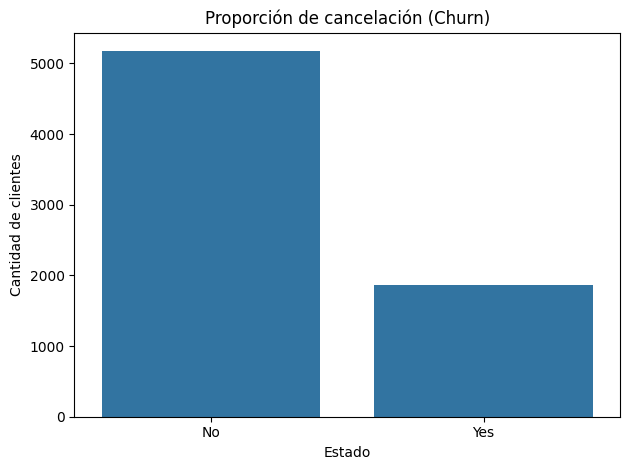

Clase minoritaria: 26.54%


In [ ]:
# Proporción Yes/No a partir del df original (más legible)
conteo = df["Churn"].value_counts()
proporcion = (df["Churn"].value_counts(normalize=True) * 100).round(2)
resumen = pd.DataFrame({"conteo": conteo, "porcentaje": proporcion})
print(resumen)

# Visualización
sns.countplot(x="Churn", data=df)
plt.title("Proporción de cancelación (Churn)")
plt.xlabel("Estado")
plt.ylabel("Cantidad de clientes")
plt.tight_layout()
plt.show()

# Señal rápida de desbalance
minor_pct = proporcion.min()
print(f"Clase minoritaria: {minor_pct:.2f}%")


### **Paso 5: Normalización y estándarización**

In [10]:
from sklearn.preprocessing import StandardScaler

# Identificar columnas numéricas continuas
num_cols = ["tenure", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print(X.head())

   SeniorCitizen    tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias  \
0              0 -0.950200         0.029206      -0.743701         0.029206   
1              0 -0.950200        -0.159990      -0.766154        -0.159990   
2              0 -1.153700         0.304702      -0.881525         0.304702   
3              1 -0.787401         1.104635      -0.459386         1.104635   
4              1 -1.194400         0.636624      -0.887458         0.636624   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False         True            True              True   
1         True        False           False              True   
2         True        False           False              True   
3         True         True           False              True   
4        False         True           False              True   

   MultipleLines_Yes  ...  DeviceProtection_Yes  TechSupport_Yes  \
0              False  ...                 False             True  

### **===========================**
### **🎯 Correlación y Selección de Variables**
### **===========================**

### **Paso 1: Análisis de Correlación**

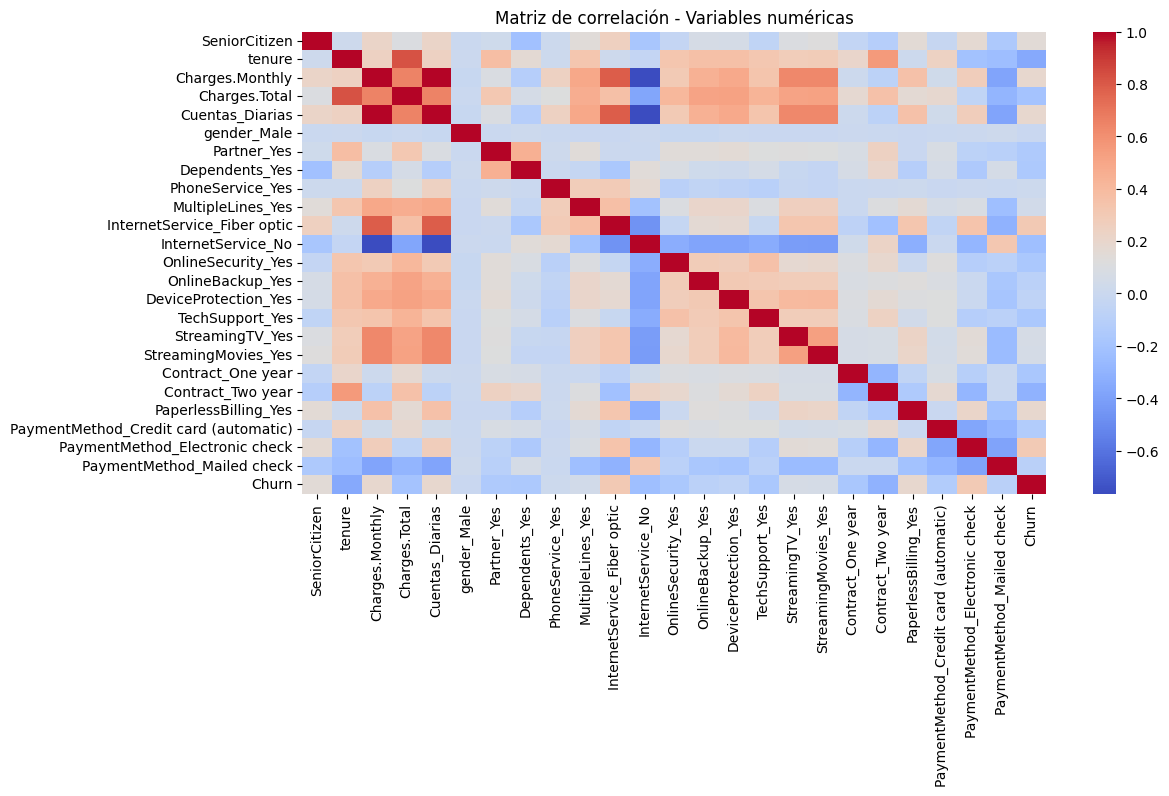

Correlación de variables con Churn:
Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
Charges.Monthly                          0.193356
Cuentas_Diarias                          0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity

In [11]:
# Matriz de correlación
corr = df_encoded.corr()

# Visualización
plt.figure(figsize=(12, 6))
sns.heatmap(corr, cmap="coolwarm", annot=False, cbar=True)
plt.title("Matriz de correlación - Variables numéricas")
plt.show()

# Correlación con la variable target
corr_target = corr["Churn"].sort_values(ascending=False)
print("Correlación de variables con Churn:")
print(corr_target)

### **Paso 2: Análisis Dirigido**

a) Tiempo de contrato (tenure) × Cancelación

Clientes con mayor antigüedad suelen cancelar menos.
Se puede ver con boxplots:

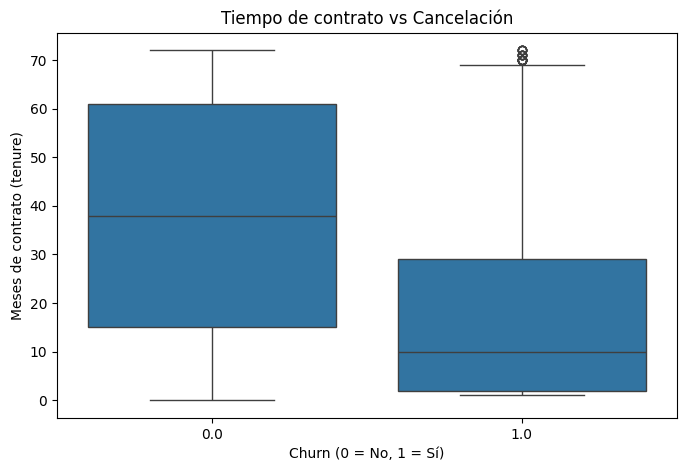

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=y, y=df["tenure"])
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Meses de contrato (tenure)")
plt.show()

b) Gasto total (Charges.Total) × Cancelación

Clientes con mayor gasto acumulado suelen ser más fieles.

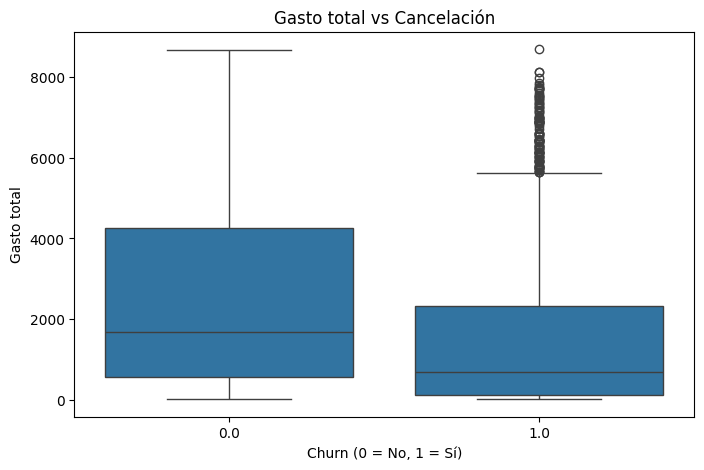

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=y, y=df["Charges.Total"])
plt.title("Gasto total vs Cancelación")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Gasto total")
plt.show()

### **Paso 3: Selección de Variables**

Limpieza y mane

In [ ]:
import numpy as np
import pandas as pd

# Normalizar texto en Churn
col = df["Churn"].astype(str).str.strip().str.lower()
col = (col.replace({"sí": "si", "s\u00ed": "si"})  
           .str.replace(r"\s+", " ", regex=True)) 

# Conjuntos de equivalencias
positivos = {"yes", "y", "si", "1", "true", "t"}
negativos = {"no", "n", "0", "false", "f"}

# Valores inválidos o "desconocidos" que deben tratarse como NaN
invalidos = {"", "-", "n/a", "n\\a", "na", "none", "null", "nan", "n/n", "unknown"}

# Marcar inválidos como NaN
col = col.where(~col.isin(invalidos), other=np.nan)

# Mapear a 1/0 y dejar lo no mapeable como NaN
def map_bin(v):
    if pd.isna(v):
        return np.nan
    if v in positivos:
        return 1
    if v in negativos:
        return 0
    # Si llega aquí, intenta mapear directamente por si ya era 0/1 como número en string
    if v.isdigit():
        return int(v)
    return np.nan

y_clean = col.map(map_bin)

print("Valores únicos originales en Churn (limpios):", sorted(col.dropna().unique().tolist())[:20], "...")
print("NaN en y_clean:", int(y_clean.isna().sum()))

# Sincronizar X e y y descartar filas inválidas
mask = y_clean.notna()
X = X.loc[mask].copy()
y = y_clean.loc[mask].astype(int)

print("Formas tras limpieza → X:", X.shape, " y:", y.shape)

# Verificación final 
assert y.isin([0, 1]).all(), "Aún hay valores no binarios en y"


Valores únicos originales en Churn (limpios): ['no', 'yes'] ...
NaN en y_clean: 224
Formas tras limpieza → X: (7043, 24)  y: (7043,)


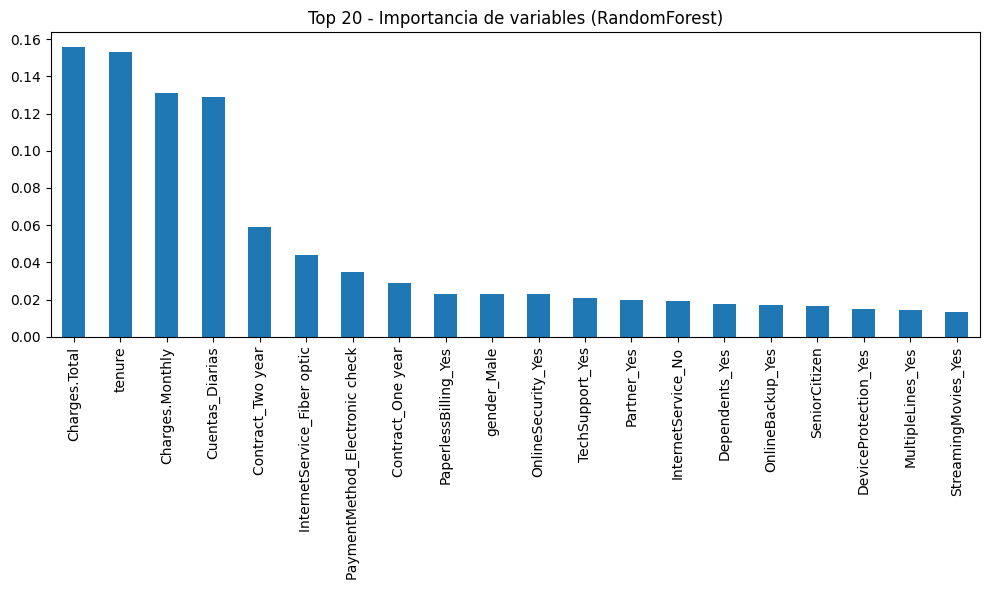

Charges.Total                            0.155842
tenure                                   0.152928
Charges.Monthly                          0.131158
Cuentas_Diarias                          0.128825
Contract_Two year                        0.058904
InternetService_Fiber optic              0.043868
PaymentMethod_Electronic check           0.034645
Contract_One year                        0.028831
PaperlessBilling_Yes                     0.023198
gender_Male                              0.022780
OnlineSecurity_Yes                       0.022775
TechSupport_Yes                          0.020655
Partner_Yes                              0.019595
InternetService_No                       0.019435
Dependents_Yes                           0.017562
OnlineBackup_Yes                         0.017249
SeniorCitizen                            0.016338
DeviceProtection_Yes                     0.014795
MultipleLines_Yes                        0.014640
StreamingMovies_Yes                      0.013582


In [16]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"  # útil con desbalance ~26%
)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)\
               .sort_values(ascending=False)

top_k = 20
plt.figure(figsize=(10, 6))
importances.head(top_k).plot(kind="bar")
plt.title(f"Top {top_k} - Importancia de variables (RandomForest)")
plt.tight_layout()
plt.show()

print(importances.head(30))


### **=================**
### **🤖 Modelado Predictivo**
### **=================**

### **Paso 1: Separación de datos** 

Dividimos en train y test. Usaremos 70/30 (por el tamaño de tu dataset ~7k filas).

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Entrenamiento:", X_train.shape, " Prueba:", X_test.shape)

Entrenamiento: (4930, 24)  Prueba: (2113, 24)


### **Paso 2: Creación de modelos** 

a) Modelo sensible a escala → Regresión Logística

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Variables numéricas continuas
num_cols = ["tenure", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]

# Preprocesamiento: escalar solo numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols)
    ],
    remainder="passthrough"
)

log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

b) Modelo no sensible a escala → Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"
)

### **Paso 3: Evaluación de los modelos** 

Creamos una función para evaluar ambos con las métricas pedidas:

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\nResultados {nombre}:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")

### **Correr evaluación**


Resultados Regresión Logística:
Accuracy : 0.7354
Precision: 0.5011
Recall   : 0.8004
F1-score : 0.6163

Resultados Random Forest:
Accuracy : 0.7842
Precision: 0.6180
Recall   : 0.4902
F1-score : 0.5467


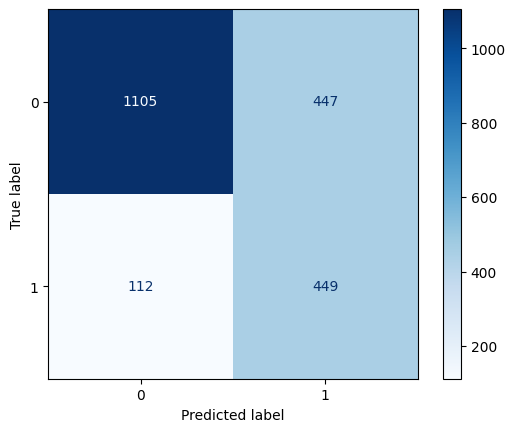

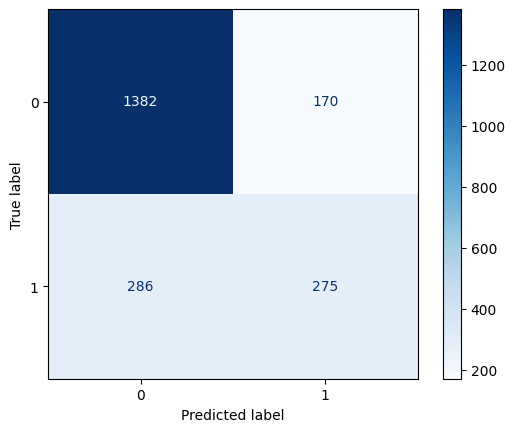

In [22]:
evaluar_modelo("Regresión Logística", log_reg, X_train, X_test, y_train, y_test)
evaluar_modelo("Random Forest", rf, X_train, X_test, y_train, y_test)

### **=======================**
### **📋 Interpretación y conclusiones**
### **=======================**

### **Regresión Logística (modelo lineal)**

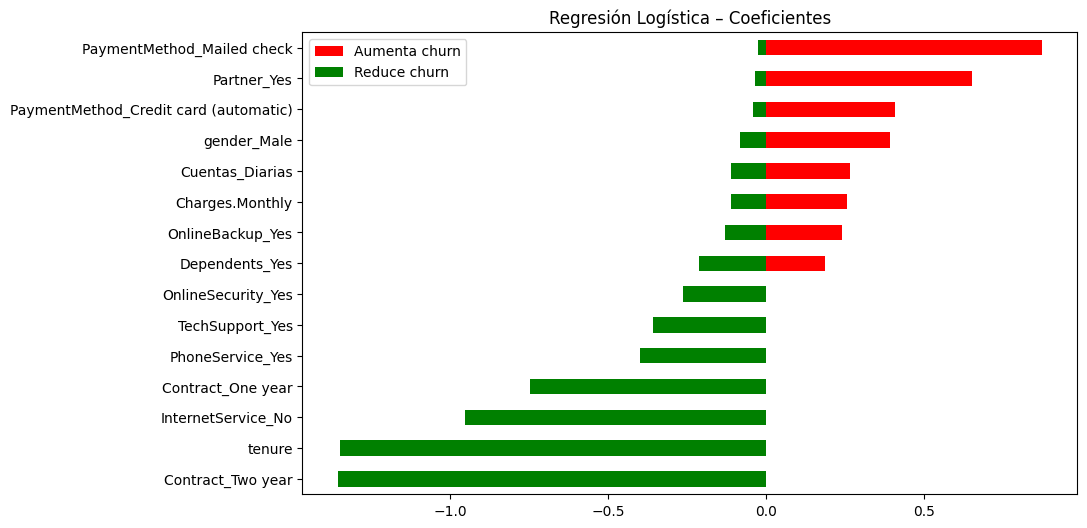

In [23]:
import numpy as np

log_reg_model = log_reg.fit(X_train, y_train)

# Extraer nombres de features tras el ColumnTransformer
feature_names = num_cols + [c for c in X.columns if c not in num_cols]

coefs = pd.Series(
    log_reg_model.named_steps["model"].coef_[0],
    index=feature_names
).sort_values()

plt.figure(figsize=(10,6))
coefs.tail(15).plot(kind="barh", color="red", label="Aumenta churn")
coefs.head(15).plot(kind="barh", color="green", label="Reduce churn")
plt.title("Regresión Logística – Coeficientes")
plt.legend()
plt.show()

### **KNN**


===== KNN =====
Accuracy : 0.7553241836251775
Precision: 0.5418250950570342
Recall   : 0.5080213903743316
F1-score : 0.5243790248390064


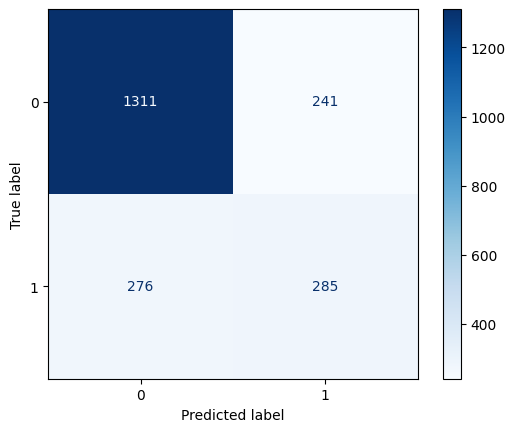

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Definir pipeline KNN (con escalado de numéricas)
num_cols = ["tenure","Charges.Monthly","Charges.Total","Cuentas_Diarias"]
preproc = ColumnTransformer([("num", StandardScaler(), num_cols)], remainder="passthrough")

knn = Pipeline([
    ("prep", preproc),
    ("clf", KNeighborsClassifier(n_neighbors=5))
])

# Entrenar y predecir
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Métricas
print("\n===== KNN =====")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_knn, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_knn, zero_division=0))

# Matriz de confusión
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot(cmap="Blues")
plt.show()

### **Random Forest**

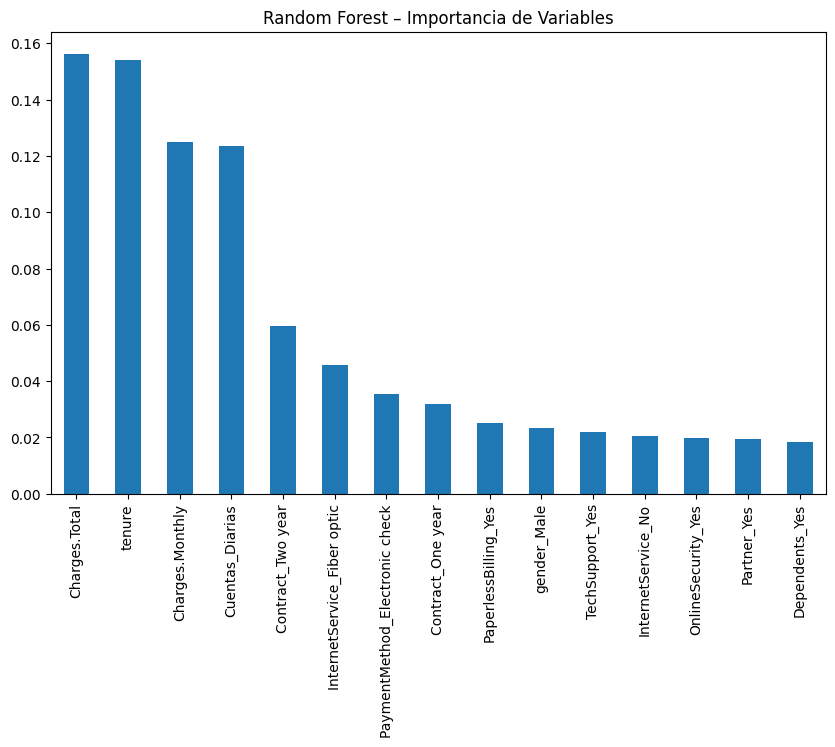

In [24]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(15).plot(kind="bar")
plt.title("Random Forest – Importancia de Variables")
plt.show()

### **SVM**

In [25]:
from sklearn.svm import LinearSVC

svm = LinearSVC(class_weight="balanced", max_iter=5000)
svm.fit(X_train, y_train)

coefs_svm = pd.Series(svm.coef_[0], index=X.columns).sort_values(ascending=False)
print(coefs_svm.head(10))

InternetService_Fiber optic       0.624732
StreamingTV_Yes                   0.212195
StreamingMovies_Yes               0.207340
PaperlessBilling_Yes              0.148226
PaymentMethod_Electronic check    0.146598
MultipleLines_Yes                 0.145525
Charges.Total                     0.132856
PhoneService_Yes                  0.091247
SeniorCitizen                     0.063504
DeviceProtection_Yes              0.051075
dtype: float64


### **Conclusión**

### **Informe Final – Predicción de Cancelación de Clientes** 
**Factores que influyen en la cancelación**

Al analizar los datos y los modelos, quedó claro que hay ciertos factores que hacen que un cliente tenga más probabilidad de cancelar:

- Los contratos mensuales (Month-to-Month) son el mayor indicador de riesgo, porque los clientes no están comprometidos a largo plazo y pueden irse fácilmente.

- El método de pago Electronic Check aparece como un fuerte predictor de cancelación, comparado con pagos automáticos o con tarjeta.

- Los clientes con poca antigüedad (tenure bajo) también muestran más tendencia a cancelar, lo que indica que los primeros meses son críticos.

- El servicio de Fiber Optic, aunque es moderno, también se relaciona con un churn más alto, probablemente por su costo o por la experiencia del servicio.

En cambio, algunos factores funcionan como protección:

- Contratos de 1 o 2 años, que reducen bastante la probabilidad de churn.

- Un mayor gasto acumulado (Total Charges), que refleja clientes más fidelizados.

- La contratación de servicios extra como Tech Support o Seguridad Online, que añaden valor y mejoran la permanencia.

**Resultados de los modelos**

Probamos tres modelos distintos:

- Random Forest fue el más efectivo, sobre todo en recall y F1-score, lo que significa que identifica mejor a los clientes en riesgo de cancelar.

- Regresión Logística no alcanzó el mismo nivel de desempeño, pero fue clave para entender cómo las variables impactan en la probabilidad de churn.

- KNN tuvo un resultado más intermedio, útil para comparar pero menos fuerte que los otros dos.

En resumen, el Random Forest se quedó como el modelo más confiable para este problema.

**Estrategias de retención recomendadas**

Con base en estos hallazgos, algunas acciones que podrían ayudar a reducir la cancelación son:

1. Incentivar contratos más largos, ofreciendo beneficios a clientes que pasen de mensual a anual o bianual.

2. Promover los pagos automáticos y disminuir la dependencia del electronic check.

3. Reforzar la fidelización en los primeros meses, con soporte adicional, descuentos iniciales o atención personalizada.

4. Optimizar la experiencia del servicio de Fiber Optic, para reducir las cancelaciones asociadas a ese producto.

5. Impulsar paquetes de valor que incluyan servicios adicionales como soporte técnico o seguridad online, que están relacionados con menor churn.